# Instruções Gerais

*   A atividade é **individual**. Cópias e plágios não serão tolerados
*   Data de entrega: **23/07/2021, até as 23:59h**

  * Apenas pelo **Classroom**
  * Façam uma cópia do notebook, e trabalhem nela para a entrega até o prazo definido
  * **Atentem para todos os pontos de `# TODO:`**, pois estes são os pontos de implemenntação
* Sobre política de atrasos: 
  * cada aluno terá a **tolerância de 2 dias de atraso, considerado todos os exercícios** propostos. 
  * A partir do terceiro dia, 60% da nota obtida será computada. 
  * Do quarto dia em diante, não será atribuída nota alguma.



# Imports iniciais

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Definição de um model simples para testes usando sklearn

In [62]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

# Carregando e Divisão de Dados

In [91]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

## Validação cruzada

### Holdout

In [89]:
# defina a separação dos dados (X, y) utilizando 70% para treino e 30% para teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3,random_state=1) # passando test_size como 0.3 é possível utilizar 30% do conjunto para testes e 70% para treinamento


# TODO: treine e avalie o modelo com os dados separados
model.fit(X_train,y_train)

results_training = model.predict(X_train)
results_prediction = model.predict(X_test)

print("Knn ACC TRAINING:", accuracy_score(y_train, results_training))
print("Knn ACC TEST:",accuracy_score(y_test, results_prediction))

Knn ACC TRAINING: 0.9523809523809523
Knn ACC TEST: 0.9777777777777777


### K-Folds

É possível usar o módulo [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) do sklearn

In [90]:
from sklearn.model_selection import cross_val_score
folds = 3
# TODO: defina aqui a chamada
print("cv_score:")
print(cross_val_score(model, x, y, cv=folds))

cv_score:
[0.98 0.96 0.98]


Ou até expandir para executar o K vezes, seguindo um processo manual

In [92]:
from sklearn.model_selection import KFold
x_times = 3
k_folds = 3
accs = []

for k in range(x_times):
    splits = KFold(n_splits=k_folds, shuffle=True)
    # a chamada .split() retorna os índices que devem ser usados em cada rodada
    for train, test in splits.split(x):
      X_train, X_test = x[train],x[test]
      y_train, y_test = y[train],y[test]
      # TODO: Treino e avaliação

      model.fit(X_train,y_train)
      results = model.predict(X_test)
      accs.append(accuracy_score(y_test, results))
      print("Knn ACC TEST:",accuracy_score(y_test, results))

average = sum(accs)/len(accs)
print("Acurácia média: %.2f"  % (average))

Knn ACC TEST: 0.98
Knn ACC TEST: 0.88
Knn ACC TEST: 0.96
Knn ACC TEST: 0.96
Knn ACC TEST: 0.98
Knn ACC TEST: 0.96
Knn ACC TEST: 0.94
Knn ACC TEST: 0.96
Knn ACC TEST: 0.98
Acurácia média: 0.96


# Regressão Linear

Geração aleatória de um conjunto de dados simples

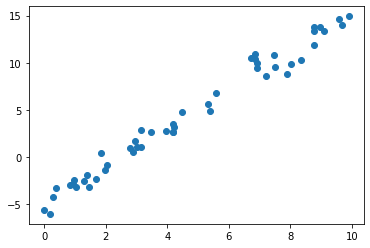

In [20]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Importação e utilização do módulo [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)  para fazer um ajuste linear as dados gerados

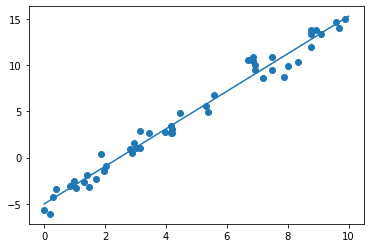

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

x_fit = np.linspace(0, 10, 1000)
y_fit = model.predict(x_fit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x_fit, y_fit);

Agora, considere a implementação da Regressão Linear do zero, sem o uso do `sklearn` ou outra biblioteca de Machine Learninng.

In [22]:
# TODO:

# Máquinas de Vetores de Suporte

Geração de dados iniciais

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


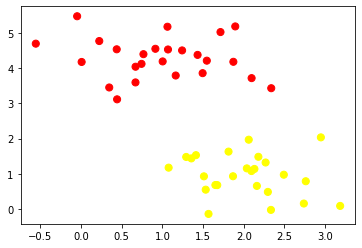

In [23]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Para definir o modelo, podemos usar módule [`SVC (Support Vector Classifier)`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) do [`sklearn.svm`](https://scikit-learn.org/stable/modules/svm.html#:~:text=Support%20vector%20machines%20(SVMs)%20are,than%20the%20number%20of%20samples.)

In [24]:
from sklearn.svm import SVC

Com teste inicial, podemos treinar e avaliar um modelo com um kernel linear

In [25]:
# TODO: separação dos dados X, y
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

results_training = model.predict(X_train)
results_test = model.predict(X_test)

print("SVC ACC TRAINING:",accuracy_score(y_train, results_training))
print("SVC ACC TEST:",accuracy_score(y_test, results_test))

SVC ACC TRAINING: 1.0
SVC ACC TEST: 1.0


E para problemas não lineares?

Geração de dados

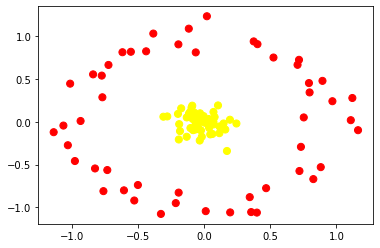

In [26]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

A partir da visualização anterior dos dados, encontre a melhor configuração para um modelo `SVM` (lembrem-se do `truque do kernel` -- variem este parâmetro [`rbf`, `poly`, `sigmoid`, etc]). Para isso, façam testes paramétricos e avaliem o resultado obtido.

Dica: é possível plotar os vetores de suporte para entender o comportamento após treinamento. Vejam o `model.support_vectors`

[ 1  4 34 41 42 60 62 63 15 23 24 26 52 66]
[8 6]


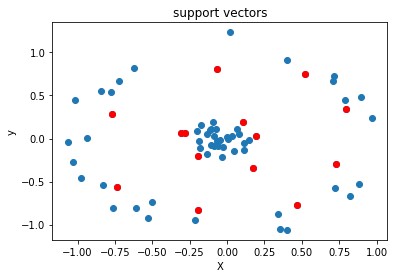

SVC rbf ACC TRAINING : 1.0
SVC rbf ACC TEST: 1.0


In [27]:
# TODO: 
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=1)

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

results_training = model.predict(X_train)
results_test = model.predict(X_test)

support_vector_indices = model.support_
print(support_vector_indices)

support_vectors_per_class = model.n_support_
print(support_vectors_per_class)

# Get support vectors themselves
support_vectors = model.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('support vectors')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

print("SVC rbf ACC TRAINING :",accuracy_score(y_train, results_training))
print("SVC rbf ACC TEST:",accuracy_score(y_test, results_test))



[ 1  3  4  5  6  7  9 11 13 14 17 18 19 21 22 25 27 31 32 34 36 39 40 41
 42 44 45 50 51 53 59 60 62 63  0  2  8 12 16 20 23 26 28 29 30 33 35 37
 38 43 46 47 49 52 54 55 56 57 58 61 64 65 66 67 68 69]
[34 32]


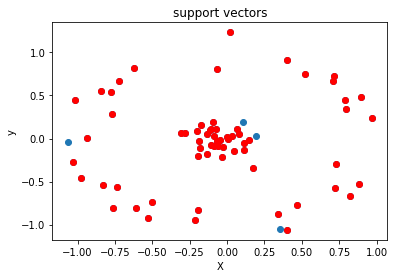

SVC poly ACC TRAINING: 0.7285714285714285
SVC poly ACC TEST: 0.6666666666666666


In [28]:
model = SVC(kernel='poly')
model.fit(X_train, y_train)

results_training = model.predict(X_train)
results_test = model.predict(X_test)

support_vector_indices = model.support_
print(support_vector_indices)

support_vectors_per_class = model.n_support_
print(support_vectors_per_class)

# Get support vectors themselves
support_vectors = model.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('support vectors')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

print("SVC poly ACC TRAINING:",accuracy_score(y_train, results_training))
print("SVC poly ACC TEST:",accuracy_score(y_test, results_test))

[ 1  3  4  5  6  7  9 10 11 13 14 17 18 19 21 22 25 27 31 32 34 36 40 41
 42 44 45 48 50 51 53 59 60 62 63  0  2  8 12 15 16 20 23 24 26 28 29 30
 33 35 37 38 43 46 47 49 52 54 55 56 57 58 61 64 65 66 67 68 69]
[35 34]


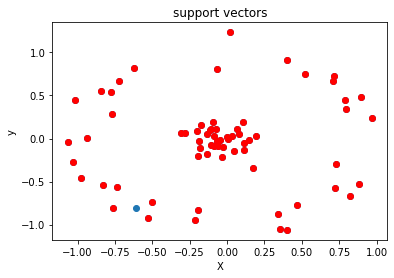

SVC sigmoid ACC TRAINING: 0.5428571428571428
SVC sigmoid ACC TEST: 0.6333333333333333


In [29]:
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)

support_vector_indices = model.support_
print(support_vector_indices)

support_vectors_per_class = model.n_support_
print(support_vectors_per_class)

# Get support vectors themselves
support_vectors = model.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('support vectors')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

results_training = model.predict(X_train)
results_test = model.predict(X_test)

print("SVC sigmoid ACC TRAINING:",accuracy_score(y_train, results_training))
print("SVC sigmoid ACC TEST:",accuracy_score(y_test, results_test))

# Árvores de decisão: classificação de dígitos

Carregamento dos dados

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [31]:
# TODO: façam a separação dos dados utilizando um coonjunto holdout 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=1)



# TODO: treinem o modelo
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)

# TODO: avaliem o resultado
dtc.predict(X_test)

results_training = dtc.predict(X_train)
results_test = dtc.predict(X_test)

print("DTC ACC TRAINING:",accuracy_score(y_train, results_training))
print("DTC ACC TEST:",accuracy_score(y_test, results_test))

DTC ACC TRAINING: 1.0
DTC ACC TEST: 0.8592592592592593


# Ensemble

Escolha pelo menos 2 modelos discutidos para fazer um ensemble utilizando o mesmo conjunto de dados do exemplo anterior

In [32]:
# TODO: